In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
# 设置随机种子确保可复现
np.random.seed(42)
random.seed(42)

# 生成30个随机城市坐标
num_cities = 30
cities = np.random.rand(num_cities, 2) * 100  # 0-100范围内的坐标

# 计算距离矩阵
def calculate_distance_matrix(cities):
    n = len(cities)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist = np.linalg.norm(cities[i] - cities[j])
            dist_matrix[i][j] = dist_matrix[j][i] = dist
    return dist_matrix

distance_matrix = calculate_distance_matrix(cities)

In [3]:
# 1. 创建随机路径（染色体）
def create_individual(num_cities):
    return random.sample(range(num_cities), num_cities)

# 2. 计算路径长度
def calculate_path_length(path, dist_matrix):
    total = 0
    for i in range(len(path)-1):
        total += dist_matrix[path[i]][path[i+1]]
    total += dist_matrix[path[-1]][path[0]]  # 返回起点
    return total

# 3. 适应度函数（与路径长度成反比）
def fitness(path, dist_matrix):
    return 1.0 / calculate_path_length(path, dist_matrix)

# 4. 顺序交叉(OX)
def ox_crossover(parent1, parent2):
    size = len(parent1)
    # 随机选择两个切割点
    start, end = sorted(random.sample(range(size), 2))
    
    # 创建子代，初始化为None
    child = [None] * size
    
    # 复制父代1的中间部分
    child[start:end] = parent1[start:end]
    
    # 从父代2中按顺序填充剩余城市
    pos = end
    for city in parent2[end:] + parent2[:end]:
        if city not in child:
            if pos >= size:
                pos = 0
            child[pos] = city
            pos += 1
    
    return child

# 5. 倒序变异
def inversion_mutation(path):
    # 随机选择两个点
    i, j = sorted(random.sample(range(len(path)), 2))
    # 反转中间部分
    path[i:j] = reversed(path[i:j])
    return path

# 6. 锦标赛选择
def tournament_selection(population, fitnesses, tournament_size=3):
    # 随机选择tournament_size个个体
    tournament_indices = random.sample(range(len(population)), tournament_size)
    tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
    
    # 返回适应度最高的个体
    winner_idx = tournament_indices[np.argmax(tournament_fitnesses)]
    return population[winner_idx]

In [4]:
def genetic_algorithm_tsp(cities, distance_matrix, 
                         pop_size=100, num_generations=500,
                         crossover_prob=0.8, mutation_prob=0.05,
                         elitism_size=1):
    
    num_cities = len(cities)
    # 1. 初始化种群
    population = [create_individual(num_cities) for _ in range(pop_size)]
    
    # 用于记录最佳路径长度
    best_lengths = []
    best_individual = None
    
    # 2. 迭代优化
    for generation in range(num_generations):
        # 计算适应度
        fitnesses = [fitness(ind, distance_matrix) for ind in population]
        path_lengths = [calculate_path_length(ind, distance_matrix) for ind in population]
        
        # 记录当前最佳
        best_idx = np.argmin(path_lengths)
        best_length = path_lengths[best_idx]
        best_lengths.append(best_length)
        
        if generation == 0 or best_length < best_lengths[-2]:
            best_individual = population[best_idx].copy()
        
        # 3. 创建新种群
        new_population = []
        
        # 精英保留
        elite_indices = np.argsort(path_lengths)[:elitism_size]
        for idx in elite_indices:
            new_population.append(population[idx])
        
        # 生成剩余个体
        while len(new_population) < pop_size:
            # 选择
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            
            # 交叉
            if random.random() < crossover_prob:
                child = ox_crossover(parent1, parent2)
            else:
                child = parent1.copy()
            
            # 变异
            if random.random() < mutation_prob:
                child = inversion_mutation(child)
            
            new_population.append(child)
        
        # 更新种群
        population = new_population[:pop_size]
        
        # 打印进度
        if generation % 50 == 0:
            print(f"代数 {generation}: 最佳路径长度 = {best_length:.2f}")
    
    return best_individual, best_lengths

代数 0: 最佳路径长度 = 1347.17
代数 50: 最佳路径长度 = 571.25
代数 100: 最佳路径长度 = 502.02
代数 150: 最佳路径长度 = 498.18
代数 200: 最佳路径长度 = 498.18
代数 250: 最佳路径长度 = 498.18
代数 300: 最佳路径长度 = 498.18
代数 350: 最佳路径长度 = 498.18
代数 400: 最佳路径长度 = 498.18
代数 450: 最佳路径长度 = 498.18
代数 500: 最佳路径长度 = 498.18
代数 550: 最佳路径长度 = 498.18
代数 600: 最佳路径长度 = 498.18
代数 650: 最佳路径长度 = 498.18
代数 700: 最佳路径长度 = 498.18
代数 750: 最佳路径长度 = 498.18

最终最佳路径长度: 498.18


/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_51996/977853731.py:49: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_51996/977853731.py:49: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_51996/977853731.py:49: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_51996/977853731.py:49: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_51996/977853731.py:49: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4

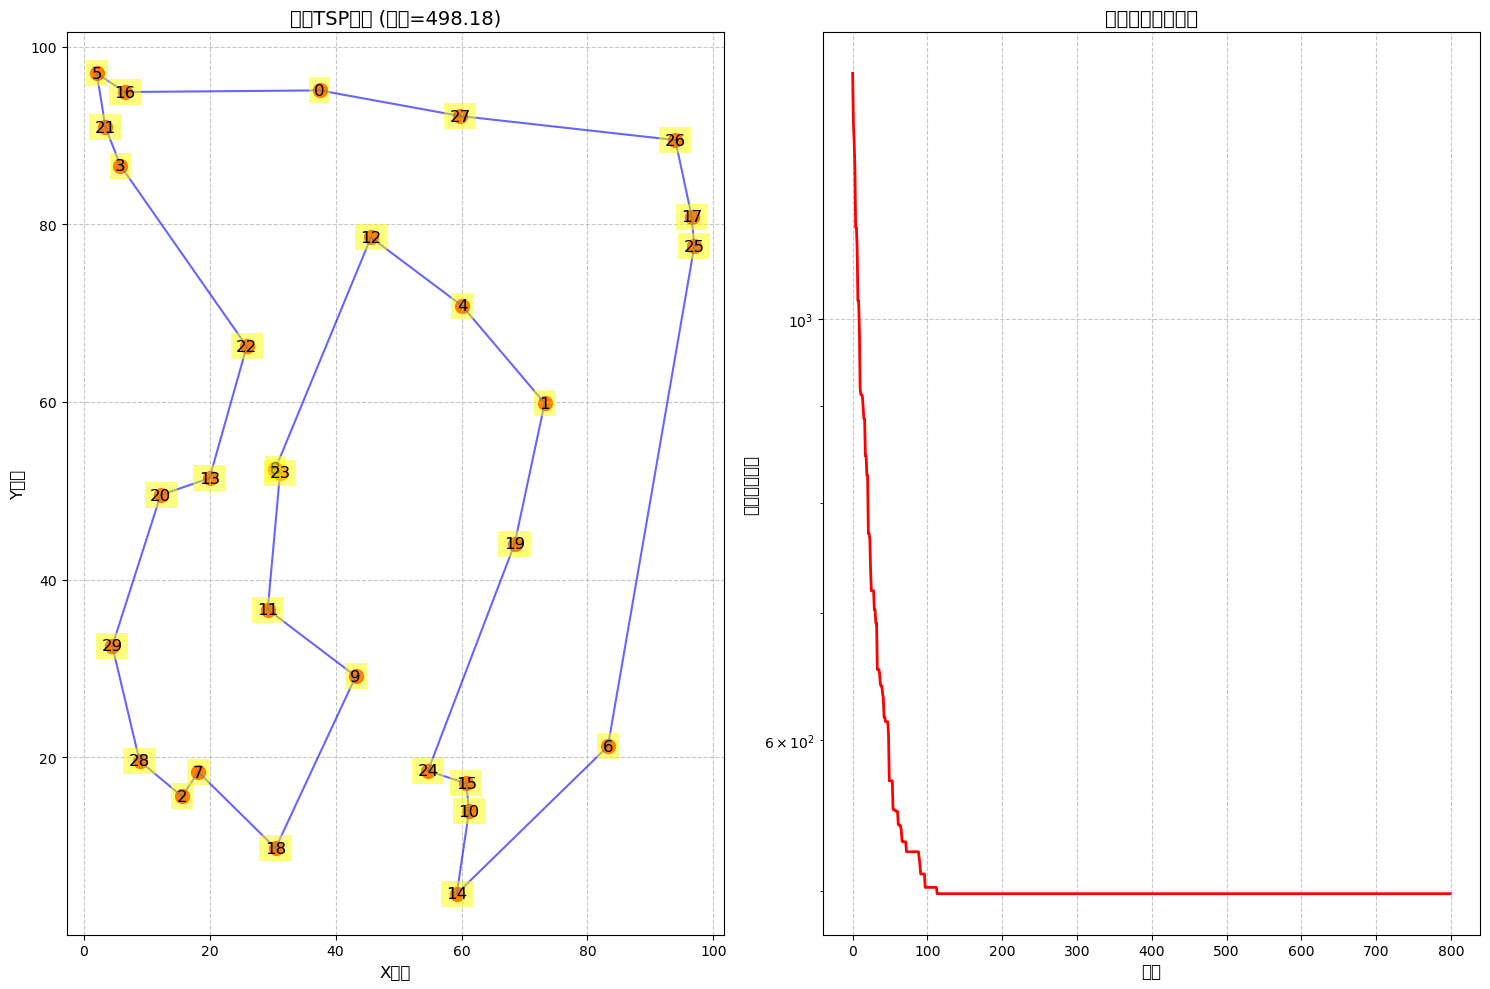

In [5]:
# 运行遗传算法
best_path, convergence = genetic_algorithm_tsp(
    cities, distance_matrix,
    pop_size=150,
    num_generations=800,
    crossover_prob=0.85,
    mutation_prob=0.08,
    elitism_size=2
)

# 计算最佳路径长度
best_length = calculate_path_length(best_path, distance_matrix)
print(f"\n最终最佳路径长度: {best_length:.2f}")

# 可视化城市和路径
plt.figure(figsize=(15, 10))

# 绘制城市
plt.subplot(1, 2, 1)
plt.scatter(cities[:, 0], cities[:, 1], s=100, c='red', marker='o')
for i, (x, y) in enumerate(cities):
    plt.text(x, y, str(i), fontsize=12, ha='center', va='center', 
             bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='none'))

# 绘制路径
for i in range(len(best_path)-1):
    start, end = best_path[i], best_path[i+1]
    plt.plot([cities[start, 0], cities[end, 0]], 
             [cities[start, 1], cities[end, 1]], 'b-', alpha=0.6)
# 连接最后城市到起点
start, end = best_path[-1], best_path[0]
plt.plot([cities[start, 0], cities[end, 0]], 
         [cities[start, 1], cities[end, 1]], 'b-', alpha=0.6)

plt.title(f'最优TSP路径 (长度={best_length:.2f})', fontsize=14)
plt.xlabel('X坐标', fontsize=12)
plt.ylabel('Y坐标', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 绘制收敛曲线
plt.subplot(1, 2, 2)
plt.plot(convergence, 'r-', linewidth=2)
plt.title('遗传算法收敛曲线', fontsize=14)
plt.xlabel('代数', fontsize=12)
plt.ylabel('最佳路径长度', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')  # 对数坐标更清晰显示收敛过程

plt.tight_layout()
plt.show()

代数 0: 最佳路径长度 = 1374.41
代数 50: 最佳路径长度 = 709.45
代数 100: 最佳路径长度 = 600.45
代数 150: 最佳路径长度 = 524.83
代数 200: 最佳路径长度 = 519.21
代数 250: 最佳路径长度 = 517.75
代数 300: 最佳路径长度 = 494.10
代数 350: 最佳路径长度 = 493.69
代数 400: 最佳路径长度 = 493.69
代数 450: 最佳路径长度 = 493.69
代数 0: 最佳路径长度 = 1363.36
代数 50: 最佳路径长度 = 587.61
代数 100: 最佳路径长度 = 549.15
代数 150: 最佳路径长度 = 514.60
代数 200: 最佳路径长度 = 504.03
代数 250: 最佳路径长度 = 504.03
代数 300: 最佳路径长度 = 504.03
代数 350: 最佳路径长度 = 504.03
代数 400: 最佳路径长度 = 504.03
代数 450: 最佳路径长度 = 504.03
代数 0: 最佳路径长度 = 1289.28
代数 50: 最佳路径长度 = 559.20
代数 100: 最佳路径长度 = 460.46
代数 150: 最佳路径长度 = 459.89
代数 200: 最佳路径长度 = 459.89
代数 250: 最佳路径长度 = 459.89
代数 300: 最佳路径长度 = 459.89
代数 350: 最佳路径长度 = 459.89
代数 400: 最佳路径长度 = 459.89
代数 450: 最佳路径长度 = 459.89
代数 0: 最佳路径长度 = 1249.65
代数 50: 最佳路径长度 = 555.02
代数 100: 最佳路径长度 = 497.83
代数 150: 最佳路径长度 = 497.83
代数 200: 最佳路径长度 = 489.87
代数 250: 最佳路径长度 = 489.87
代数 300: 最佳路径长度 = 489.87
代数 350: 最佳路径长度 = 489.87
代数 400: 最佳路径长度 = 489.87
代数 450: 最佳路径长度 = 489.87


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaV

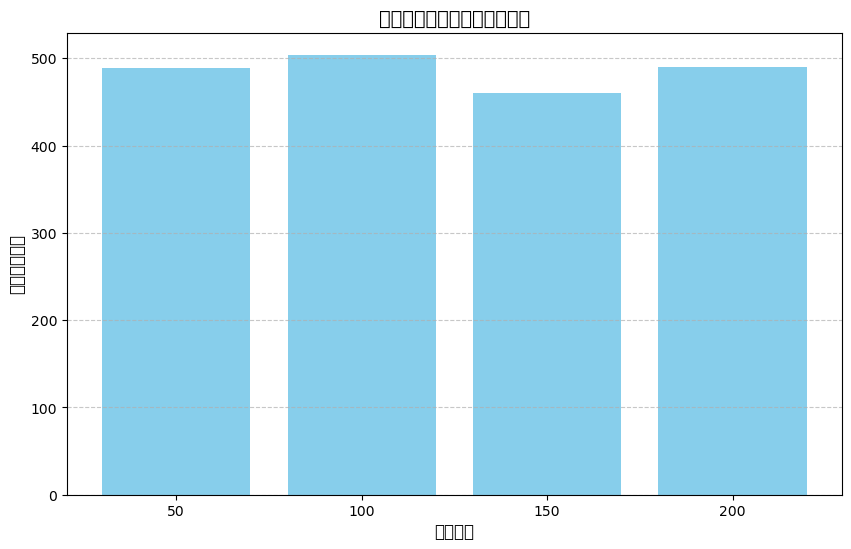

In [6]:
# 测试不同种群大小的影响
pop_sizes = [50, 100, 150, 200]
results = []

for pop_size in pop_sizes:
    _, convergence = genetic_algorithm_tsp(
        cities, distance_matrix,
        pop_size=pop_size,
        num_generations=500,
        elitism_size=2
    )
    results.append((pop_size, convergence[-1]))

# 可视化结果
plt.figure(figsize=(10, 6))
plt.bar([str(p) for p in pop_sizes], [r[1] for r in results], color='skyblue')
plt.title('种群大小对最终解质量的影响', fontsize=14)
plt.xlabel('种群大小', fontsize=12)
plt.ylabel('最佳路径长度', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()